In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

In [2]:
df = pd.read_csv("../data/xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Basic Information - Segment Level

In [3]:
df.shape

(480, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
# Missing Values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
# Missing Value Filler
df['gender'] = df['gender'].fillna('None')
df['NationalITy'] = df['NationalITy'].fillna('None')
df['PlaceofBirth'] = df['PlaceofBirth'].fillna('None')
df['StageID'] = df['StageID'].fillna('None')
df['GradeID'] = df['GradeID'].fillna('None')
df['SectionID'] = df['SectionID'].fillna('None')
df['Topic'] = df['Topic'].fillna('None')
df['Semester'] = df['Semester'].fillna('None')
df['Relation'] = df['Relation'].fillna('None')
df['raisedhands'] = df['raisedhands'].fillna(0)
df['VisITedResources'] = df['VisITedResources'].fillna(0)
df['AnnouncementsView'] = df['AnnouncementsView'].fillna(0)
df['Discussion'] = df['Discussion'].fillna(0)
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].fillna(0)
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].fillna(0)
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].fillna('None')
df['Class'] = df['Class'].fillna('None')

In [8]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

## Univariate Analysis

To identify the value and percentage of the dataframe column 

1. **Gender** - student's gender (nominal: 'Male' or 'Female’)
2. **Nationality**- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
3. **Place of birth** - student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
4. **Educational Stages** - educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)
5. **Grade Levels** - grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)
6. **Section ID** - classroom student belongs (nominal:’A’,’B’,’C’)
7. **Topic** - course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)
8. **Semester** - school year semester (nominal:’ First’,’ Second’)
9. **Parent relationship** with student (nominal:’mom’,’father’)
10. **Raised hand** - how many times the student raises his/her hand on classroom (numeric:0-100)
11. **Visited resources** - how many times the student visits a course content(numeric:0-100)
12. **Viewing announcements** - how many times the student checks the new announcements(numeric:0-100)
13. **Discussion groups** - how many times the student participate on discussion groups (numeric:0-100)
14. **Parent Answering Survey** - parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)
15. **Parent School Satisfaction** - the Degree of parent satisfaction from school(nominal:’Yes’,’No’)
16. **Student Absence Days** - the number of absence days for each student (nominal: above-7, under-7)
17. **Class** - The class/dependent variable

### Gender Variable

In [9]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage:
M    0.635417
F    0.364583
Name: gender, dtype: float64


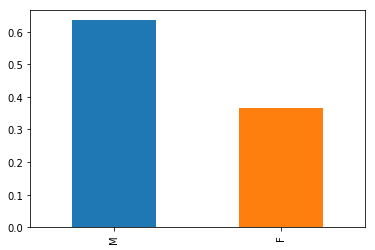

In [10]:
print('Percentage:')
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')

### Nationality Variable

In [11]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
Iran             6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Percentage:
KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
Lybia          0.012500
Iran           0.012500
USA            0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


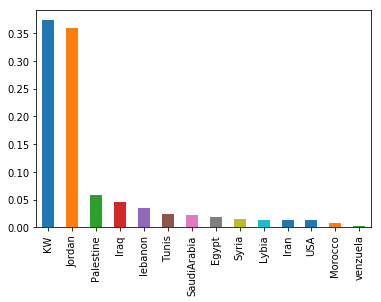

In [12]:
print('Percentage:')
print(df['NationalITy'].value_counts(normalize=True))
df['NationalITy'].value_counts(normalize=True).plot(kind='bar')

### Place of Birth Variable

In [12]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Tunis            9
Egypt            9
Syria            6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

Percentage:
KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Tunis          0.018750
Egypt          0.018750
Syria          0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


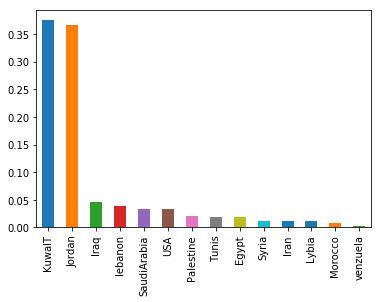

In [41]:
print('Percentage:')
print(df['PlaceofBirth'].value_counts(normalize=True))
df['PlaceofBirth'].value_counts(normalize=True).plot(kind='bar')

### Educational Stages Variable

In [13]:
df['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

Percentage:
MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


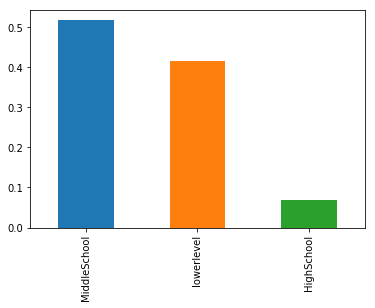

In [42]:
print('Percentage:')
print(df['StageID'].value_counts(normalize=True))
df['StageID'].value_counts(normalize=True).plot(kind='bar')

### Grade Levels Variable

In [14]:
df['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

Percentage:
G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


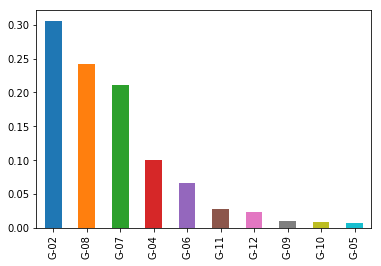

In [43]:
print('Percentage:')
print(df['GradeID'].value_counts(normalize=True))
df['GradeID'].value_counts(normalize=True).plot(kind='bar')

### Section ID Variable

In [15]:
df['SectionID'].value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

Percentage:
A    0.589583
B    0.347917
C    0.062500
Name: SectionID, dtype: float64


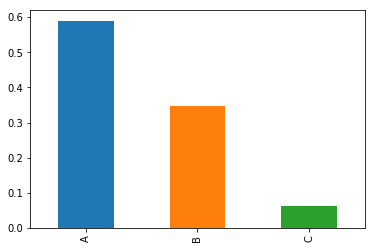

In [44]:
print('Percentage:')
print(df['SectionID'].value_counts(normalize=True))
df['SectionID'].value_counts(normalize=True).plot(kind='bar')

### Topic Variable

In [16]:
df['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

Percentage:
IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


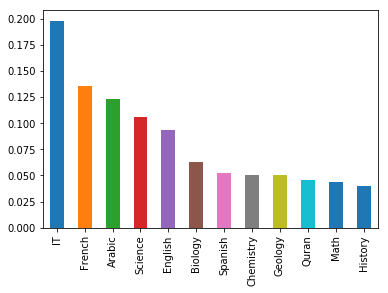

In [45]:
print('Percentage:')
print(df['Topic'].value_counts(normalize=True))
df['Topic'].value_counts(normalize=True).plot(kind='bar')

### Semester Variable

In [17]:
df['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

Percentage:
F    0.510417
S    0.489583
Name: Semester, dtype: float64


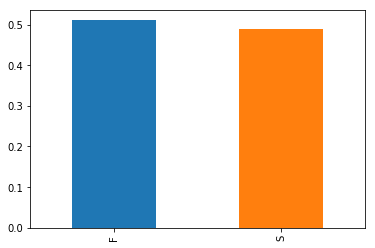

In [46]:
print('Percentage:')
print(df['Semester'].value_counts(normalize=True))
df['Semester'].value_counts(normalize=True).plot(kind='bar')

### Parent relationship Variable

In [18]:
df['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

Percentage:
Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


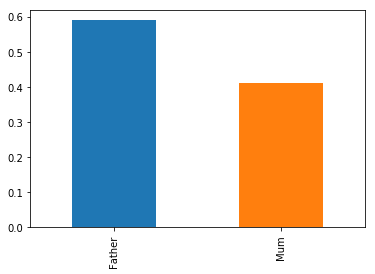

In [47]:
print('Percentage:')
print(df['Relation'].value_counts(normalize=True))
df['Relation'].value_counts(normalize=True).plot(kind='bar')

### Raised hand Variable (Top 10)

In [52]:
df['raisedhands'].value_counts()[:10]

10    31
70    31
80    28
50    17
72    17
15    14
12    12
60    12
19    11
90    11
Name: raisedhands, dtype: int64

Percentage:
10    0.064583
70    0.064583
80    0.058333
50    0.035417
72    0.035417
15    0.029167
12    0.025000
60    0.025000
19    0.022917
90    0.022917
Name: raisedhands, dtype: float64


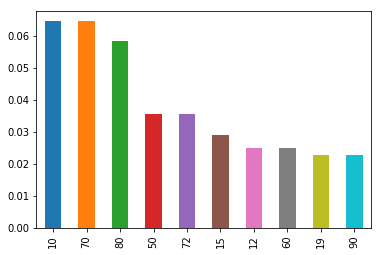

In [14]:
print('Percentage:')
print(df['raisedhands'].value_counts(normalize=True)[:10])
df['raisedhands'].value_counts(normalize=True)[:10].plot(kind='bar')

### Visited resources Variable (Top 10)

In [55]:
df['VisITedResources'].value_counts()[:10]

80    29
90    29
82    16
88    13
12    13
10    12
87    12
70    12
92    10
20    10
Name: VisITedResources, dtype: int64

Percentage:
80    0.060417
90    0.060417
82    0.033333
88    0.027083
12    0.027083
10    0.025000
87    0.025000
70    0.025000
92    0.020833
20    0.020833
Name: VisITedResources, dtype: float64


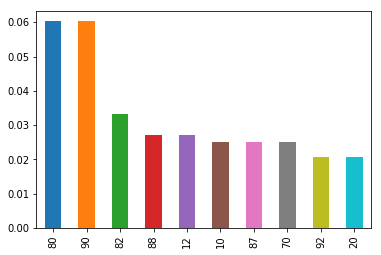

In [56]:
print('Percentage:')
print(df['VisITedResources'].value_counts(normalize=True)[:10])
df['VisITedResources'].value_counts(normalize=True)[:10].plot(kind='bar')

### Viewing announcements Variable (Top 10)

In [57]:
df['AnnouncementsView'].value_counts()[:10]

12    21
42    16
50    16
40    16
2     14
20    14
82    13
29    12
32    12
10    12
Name: AnnouncementsView, dtype: int64

Percentage:
12    0.043750
42    0.033333
50    0.033333
40    0.033333
2     0.029167
20    0.029167
82    0.027083
29    0.025000
32    0.025000
10    0.025000
Name: AnnouncementsView, dtype: float64


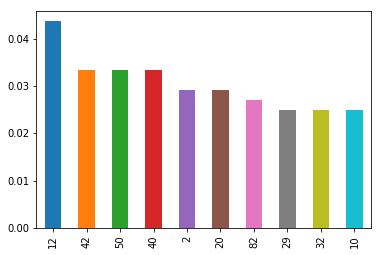

In [58]:
print('Percentage:')
print(df['AnnouncementsView'].value_counts(normalize=True)[:10])
df['AnnouncementsView'].value_counts(normalize=True)[:10].plot(kind='bar')

### Discussion groups Variable (Top 10)

In [59]:
df['Discussion'].value_counts()[:10]

70    24
40    23
33    21
50    18
30    17
10    16
80    15
14    13
53    12
20    11
Name: Discussion, dtype: int64

Percentage:
70    0.050000
40    0.047917
33    0.043750
50    0.037500
30    0.035417
10    0.033333
80    0.031250
14    0.027083
53    0.025000
20    0.022917
Name: Discussion, dtype: float64


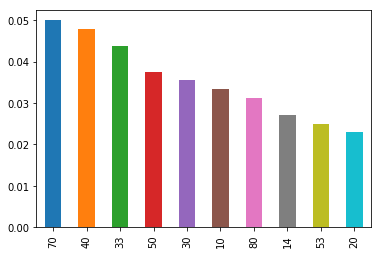

In [60]:
print('Percentage:')
print(df['Discussion'].value_counts(normalize=True)[:10])
df['Discussion'].value_counts(normalize=True)[:10].plot(kind='bar')

### Parent Answering Survey Variable

In [61]:
df['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Percentage:
Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


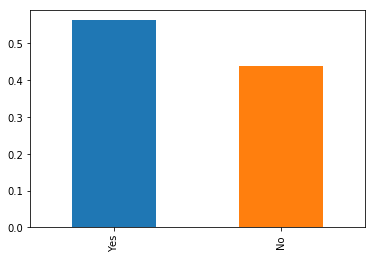

In [62]:
print('Percentage:')
print(df['ParentAnsweringSurvey'].value_counts(normalize=True))
df['ParentAnsweringSurvey'].value_counts(normalize=True).plot(kind='bar')

### Parent School Satisfaction Variable

In [30]:
df['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

Percentage:
Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


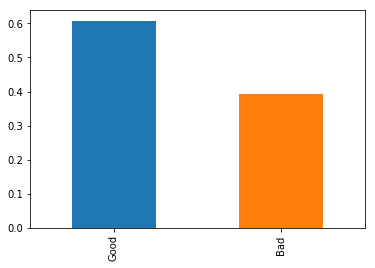

In [63]:
print('Percentage:')
print(df['ParentschoolSatisfaction'].value_counts(normalize=True))
df['ParentschoolSatisfaction'].value_counts(normalize=True).plot(kind='bar')

### Student Absence Days Variable

In [31]:
df['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Percentage:
Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


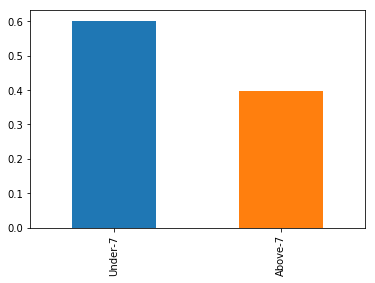

In [64]:
print('Percentage:')
print(df['StudentAbsenceDays'].value_counts(normalize=True))
df['StudentAbsenceDays'].value_counts(normalize=True).plot(kind='bar')

### Class Variable

In [65]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Percentage:
M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


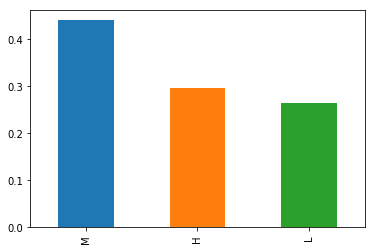

In [66]:
print('Percentage:')
print(df['Class'].value_counts(normalize=True))
df['Class'].value_counts(normalize=True).plot(kind='bar')

## Multivariate Analysis

The objective is to derive meaning from the relation between the column variables

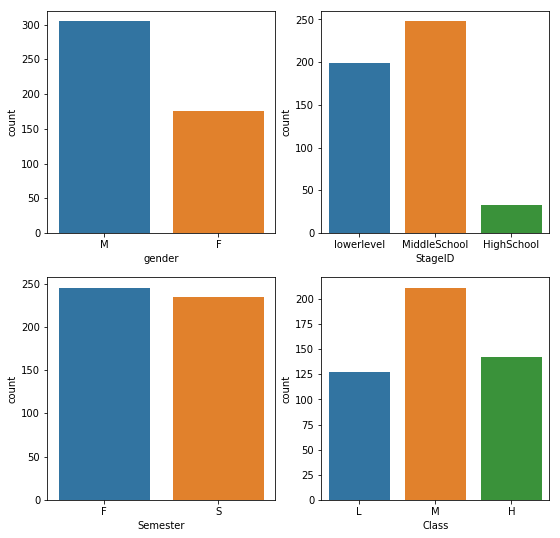

In [99]:
fig, axarr  = plt.subplots(2,2,figsize=(9,9))
sns.countplot(x='gender', data=df, ax=axarr[0,0], order=['M','F'])
sns.countplot(x='StageID', data=df, ax=axarr[0,1])
sns.countplot(x='Semester', data=df, ax=axarr[1,0])
sns.countplot(x='Class', data=df, ax=axarr[1,1], order=['L','M','H'])

From this plot, we cannot devise whether there is any variable bias present due to the even difference between unique variables

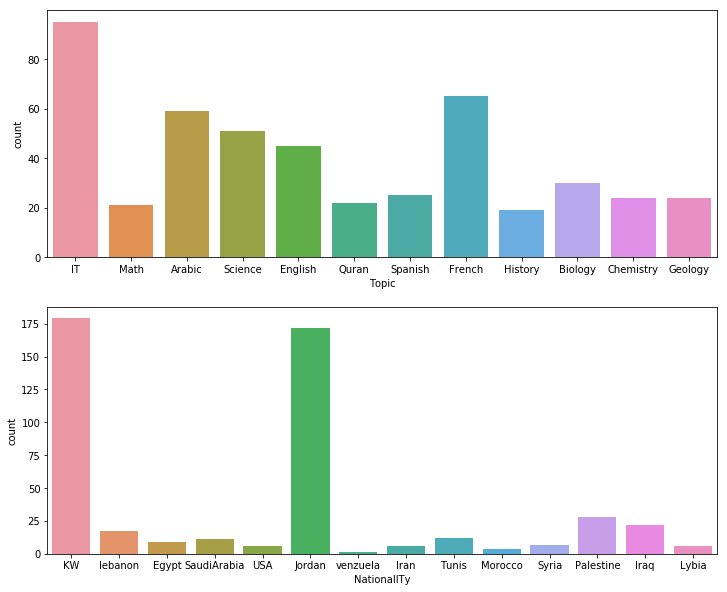

In [82]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(12,10))
sns.countplot(x='Topic', data=df, ax=axis1)
sns.countplot(x='NationalITy', data=df, ax=axis2)

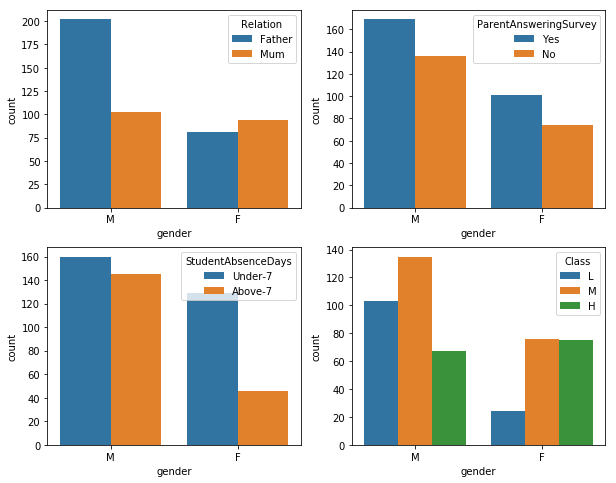

In [98]:
fig, axarr  = plt.subplots(2,2,figsize=(10,8))
sns.countplot(x='gender', hue='Relation', data=df, ax=axarr[0,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=df, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=df, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='Class', data=df, ax=axarr[1,1], order=['M','F'], hue_order=['L','M','H'])

We observe:
1. Males have higher count for relation with father compared to females.
2. Males have higher count for Parents answering survey compared to females.
3. Males are absent in school for much higher duration compared to females. (Females are focused!)
4. Males in average score lower compared to girls. 

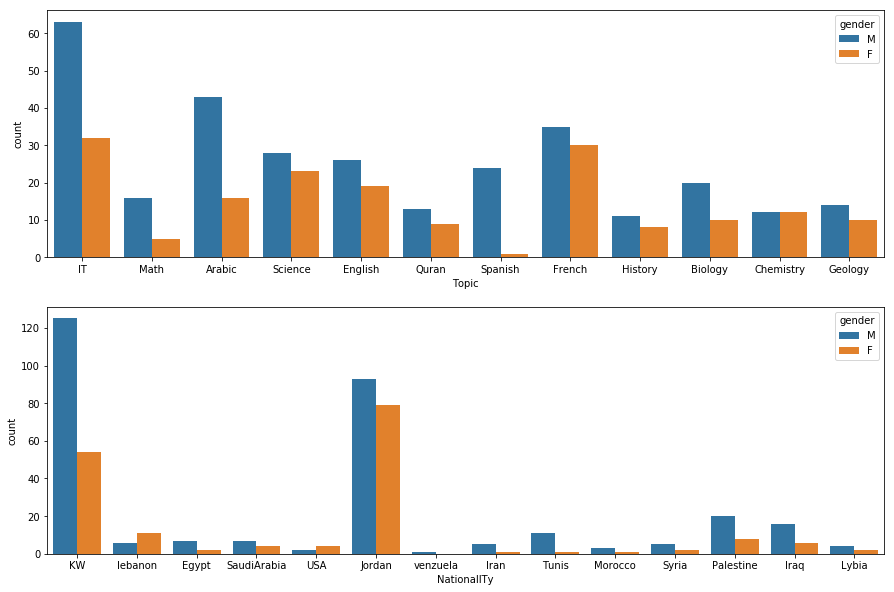

In [91]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(15,10))
sns.countplot(x='Topic', hue='gender', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=df, ax=axis2)

No bias found. Even distribution of data found.

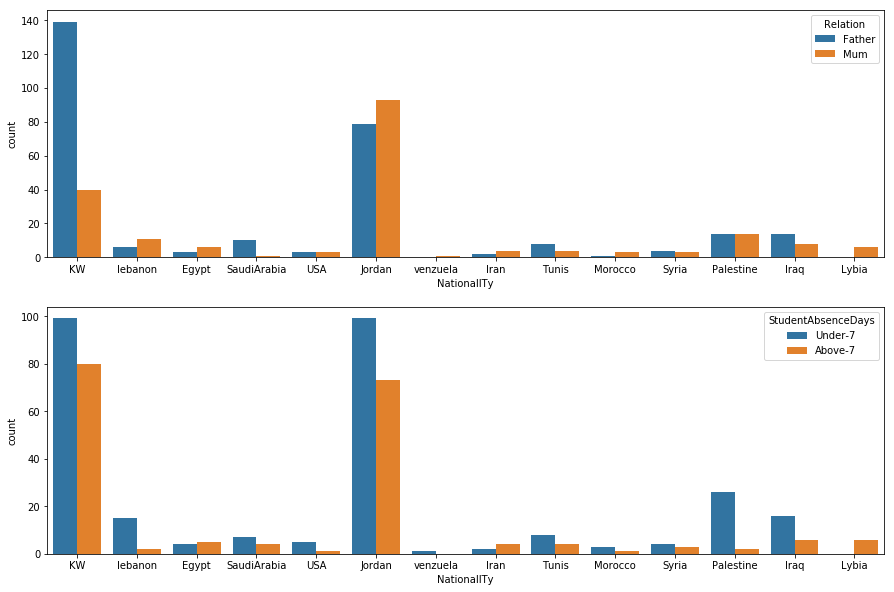

In [93]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(15,10))
sns.countplot(x='NationalITy', hue='Relation', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=df, ax=axis2)

No bias found. Even distribution of data found.

C:\Users\Subham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


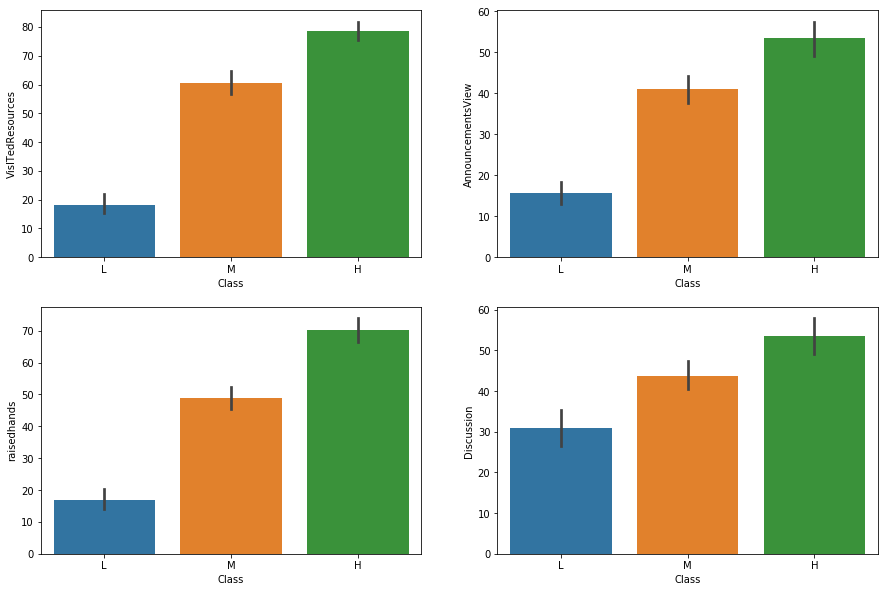

In [102]:
fig, axarr  = plt.subplots(2,2,figsize=(15,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

**The students who participated in more of (Discussion, raisedhands, AnnouncementViews, RaisedHands) got a higher grade**

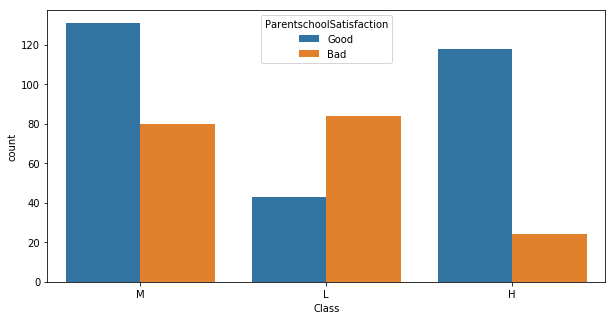

In [23]:
fig, axis1  = plt.subplots(1, 1,figsize=(10,5))
sns.countplot(x='Class', hue='ParentschoolSatisfaction', data=df, ax=axis1)

C:\Users\Subham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


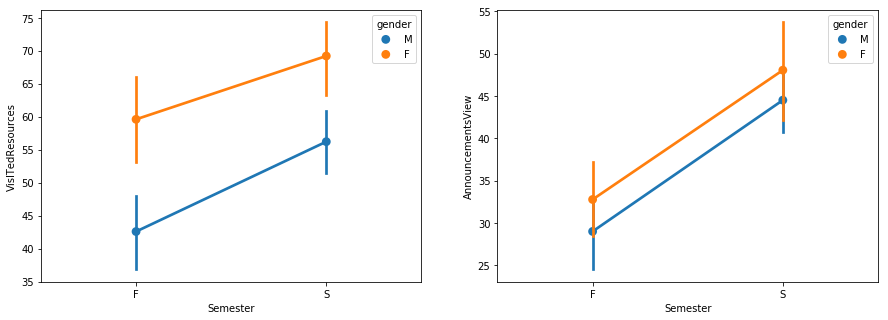

In [18]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(15,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis2)

It is observed that after first semester, the students improved upon their studies and got a higher score next semester

## PairPlot

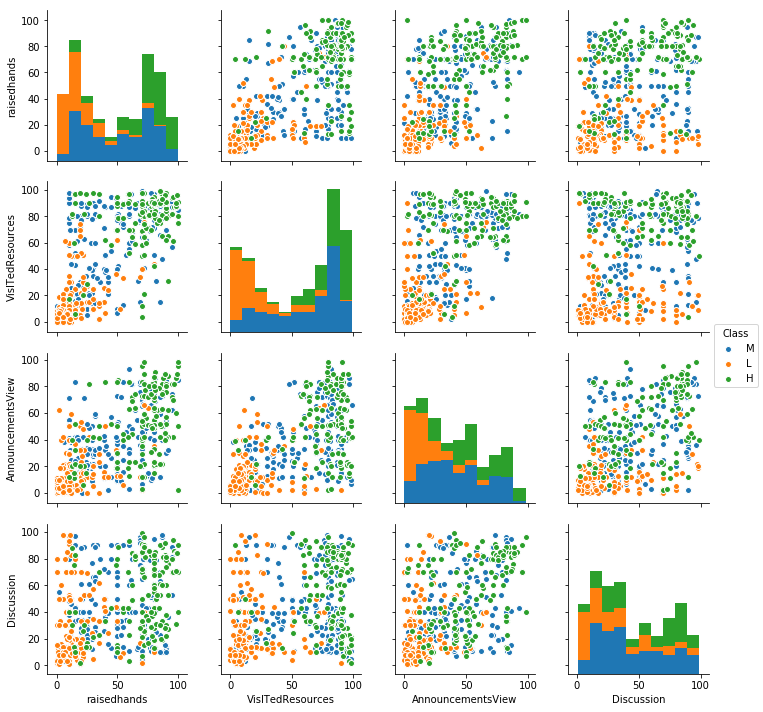

In [113]:
sns.pairplot(df,hue='Class')